# 2D KDE PLOT (Kernel Density Estimation)

Goal: Estimate the density of points in 2D space (x vs y).
This is the smooth version of a 2D histogram.

## Basic 2D KDE Plot (Seaborn)

C:\Users\Black Parrot\AppData\Local\Temp\ipykernel_15628\1422116236.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap="viridis", shade=True)


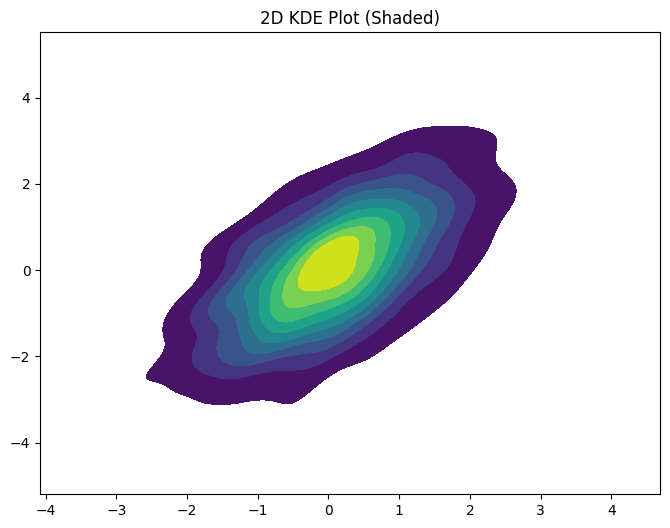

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Synthetic data
np.random.seed(42)
x = np.random.normal(0, 1, 2000)
y = 0.8 * x + np.random.normal(0, 1, 2000)

plt.figure(figsize=(8,6))
sns.kdeplot(x=x, y=y, cmap="viridis", shade=True)
plt.title("2D KDE Plot (Shaded)")
plt.show()


## 2D KDE without shading (Contours only)

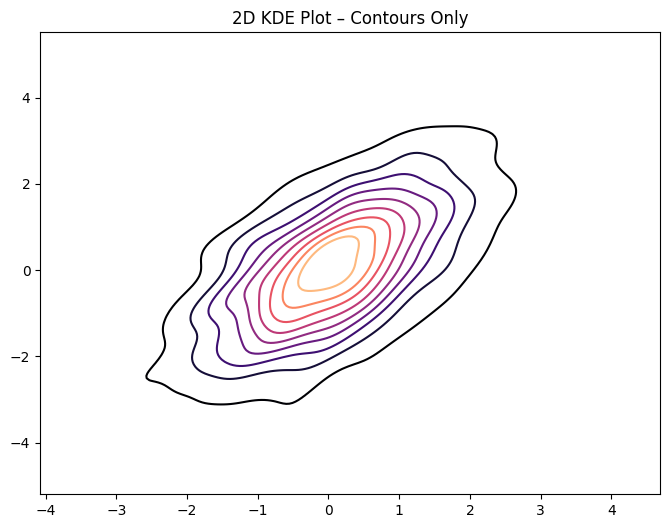

In [3]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=x, y=y, cmap="magma", fill=False)
plt.title("2D KDE Plot – Contours Only")
plt.show()


## Filled Contour KDE (contours + shading)

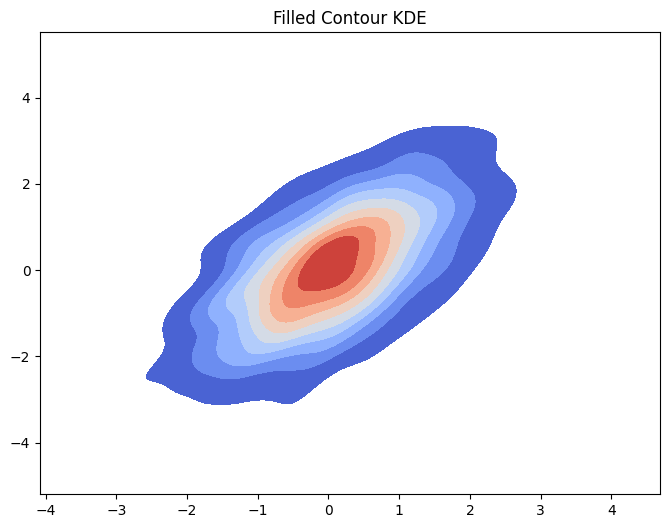

In [4]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=x, y=y, fill=True, cmap="coolwarm", thresh=0.05)
plt.title("Filled Contour KDE")
plt.show()


## KDE with Points + Shading Overlay

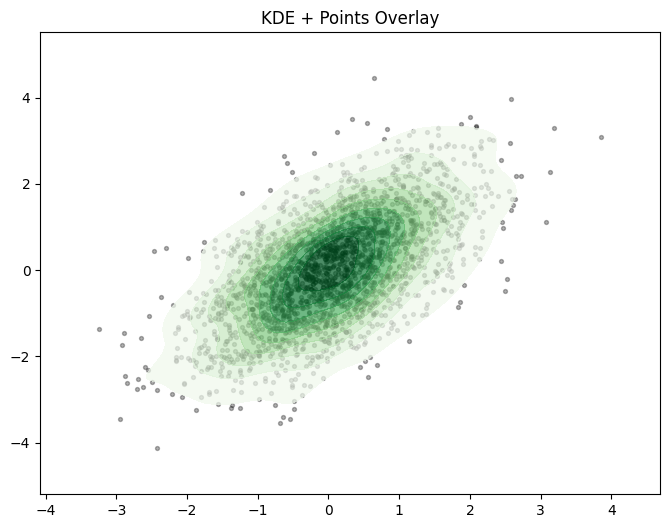

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, s=8, alpha=0.3, color="black")
sns.kdeplot(x=x, y=y, cmap="Greens", fill=True, alpha=0.7)
plt.title("KDE + Points Overlay")
plt.show()


## KDE with Bandwidth Control

Bandwidth determines how smooth the density is.

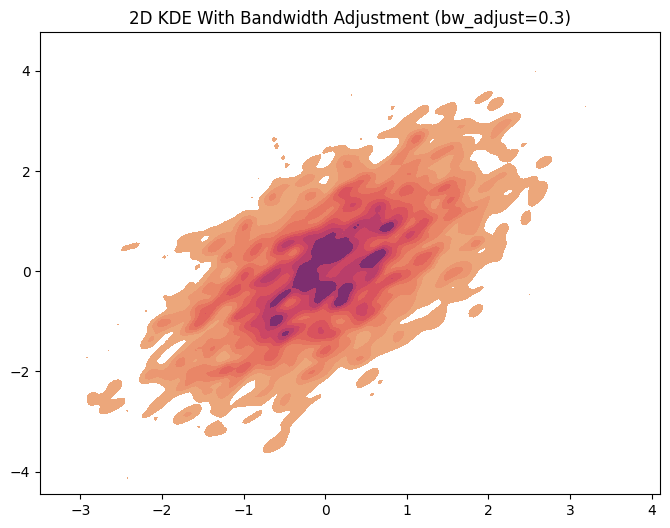

In [6]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=x, y=y,
    bw_adjust=0.3,     # smaller → more detail
    fill=True,
    cmap="flare"
)
plt.title("2D KDE With Bandwidth Adjustment (bw_adjust=0.3)")
plt.show()


## KDE With Custom Levels (Density Contours)

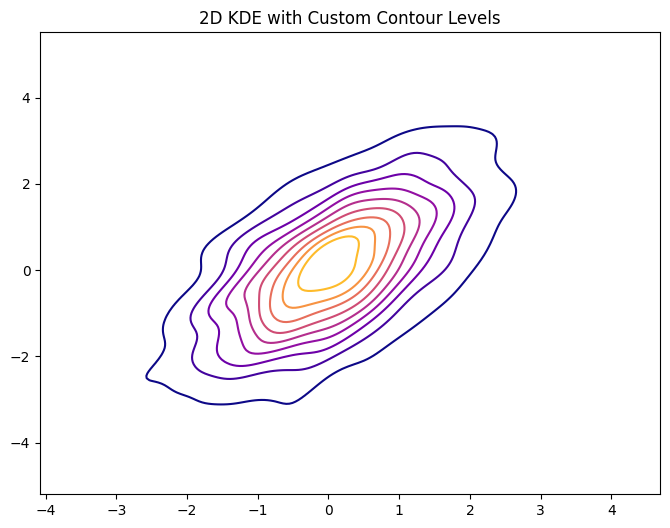

In [7]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=x, y=y,
    levels=10,      # number of contour levels
    cmap="plasma",
    fill=False
)
plt.title("2D KDE with Custom Contour Levels")
plt.show()


## KDE + Marginal Histograms (Joint Plot)

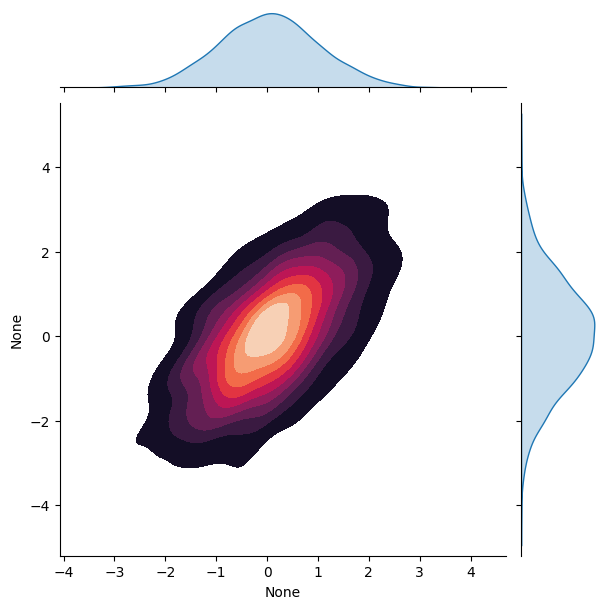

In [8]:
sns.jointplot(
    x=x, y=y,
    kind="kde",
    fill=True,
    cmap="rocket"
)


## Interactive 2D KDE (Plotly)

Plotly does not have a direct KDE function.
But we can compute KDE using SciPy → feed into Plotly.

### Step 1: Compute KDE

In [10]:
import numpy as np
from scipy.stats import gaussian_kde

# Data
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# Grid for evaluation
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
density = kde(positions).reshape(xx.shape)


### Step 2: Plot using Plotly

In [11]:
import plotly.express as px

fig = px.imshow(
    density.T,
    origin="lower",
    color_continuous_scale="Viridis",
    title="Interactive 2D KDE (Plotly)"
)

fig.update_layout(
    xaxis=dict(title="X"),
    yaxis=dict(title="Y")
)

fig.show()


## KDE Heatmap Style

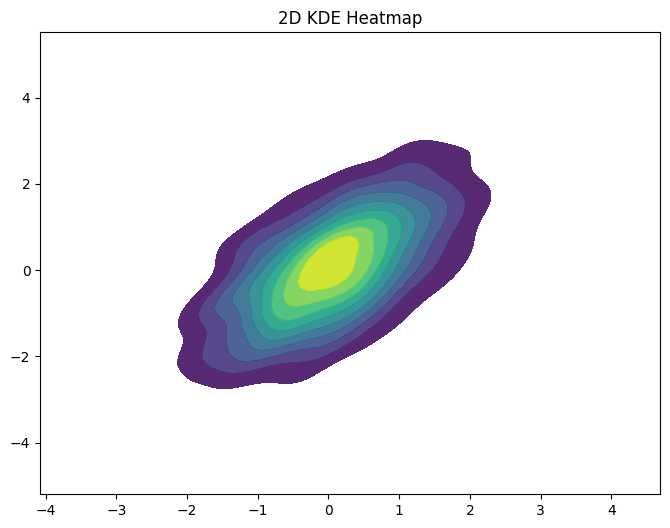

In [12]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=x, y=y,
    cmap="viridis",
    fill=True,
    alpha=0.9,
    thresh=0.1
)
plt.title("2D KDE Heatmap")
plt.show()


## KDE With Scatter, Contours & Shading (Most Complete)

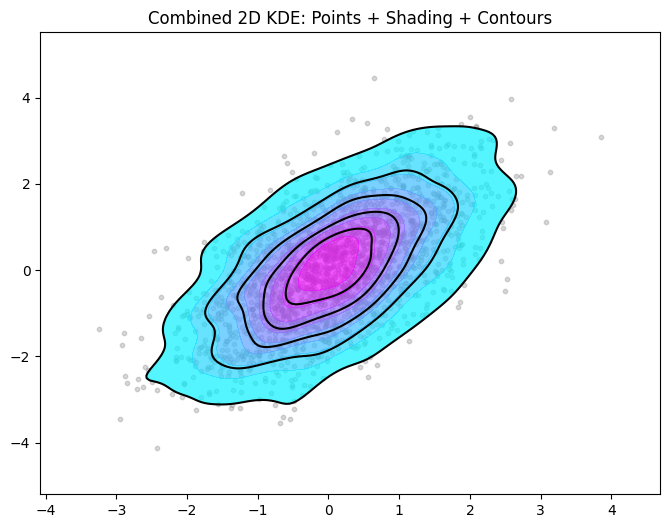

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, s=10, alpha=0.3, color="gray")
sns.kdeplot(
    x=x, y=y,
    cmap="cool",
    fill=True,
    alpha=0.7
)
sns.kdeplot(
    x=x, y=y,
    colors="black",
    levels=6
)
plt.title("Combined 2D KDE: Points + Shading + Contours")
plt.show()
